# Week 2 - Convolution (or filtering)

- Rewrite to use same "wording" and "Coding" as week 1
- Ensure mathematical terms correspond to the book
- Add stuff about PCA perhaps? Either that or introduce convolution for neural networks OR convolution for filtering.
  - Perhaps intro to entropy and cross entropy?
- Add exercise about using kernels with very big or very small values, since typically convolutions truncate between 0 to 255
- Add cross entropy to the bottom of the exercises
- Implement convolution manually as extra

We are going to use images in the form of multidimensional arrays of data (a 2D matrix for a grayscale image and  3 2D matrices in case of a RGB image) and the kernel will be a 2D matrix (usually square with an odd number of rows/columns). Therefore, we will talk about 2D convolution.

If we have our input image $f_{in}$ and a kernel K, the convolution is defined by:

$$f_{out}(x,y)=K*f_{in}(x,y)= \sum_{s}\sum_{t}K(s,t)f_{in}(x-s,y-t)$$

where $f_{out}(x,y)$ is the value of the pixel $(x,y)$ of the output image $f_{out}$.
In this exercise we are going to consider **cross correlation** as a simplified technique of the convolution.

Note: Cross correlation is implemented in a lot of machine learning libraries (as Pytorch and Tensorflow) and many times they called it **convolution**. DON'T GET CONFUSED!!! In that case you need to flip the kernel :)

Cross correlation only considers the sum of the elementwise product between the kernel and the sub-image region considered. Formally, this is defined as:

$$f_{out}(x,y)=K\star f_{in}(x,y)= \sum_{s}\sum_{t}K(s,t)f_{in}(x+s,y+t)$$

The following GIF shows how to perform the cross-correlation between an image and a kernel:

![alt text](3D_Convolution_Animation.gif "Cross correlation")




## Exercise 1: Understanding convolution
In general for the exercises:

- *Italics indicate text to explain the motivation or process behind a task*

- **Bold text indicates a task**

- Finally, \* (one star) and ** (two stars) indicates a difficult or a particuarly difficult task, respectively. These are especially optional!

Firstly we will run some code to load an image

In [5]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as scipy_conv2d
from os.path import join
from time import time

Load the image

In [6]:
image_gray = np.array(Image.open(join('images', 'kb_grayscale.jpg')))
print(image_gray.shape)

(720, 1080)


Define a function to show images 

In [7]:
def show_image(image_gray, name='', cmap='gray', show=True):
    plt.imshow(image_gray, cmap=cmap)
    plt.title(f'Image of shape {image_gray.shape} {name}')
    plt.axis('off')
    plt.tight_layout()
    if show:
        plt.show()

**1. Inspect the following code where np.pad is used to pad the image. Change the values of the padding_size variable to get an understanding of which value relates to which dimension.**

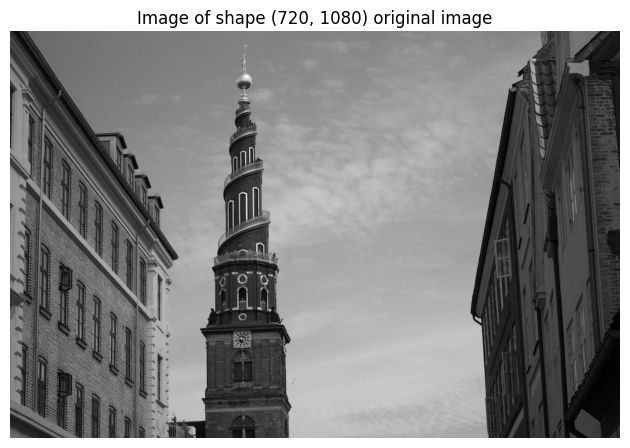

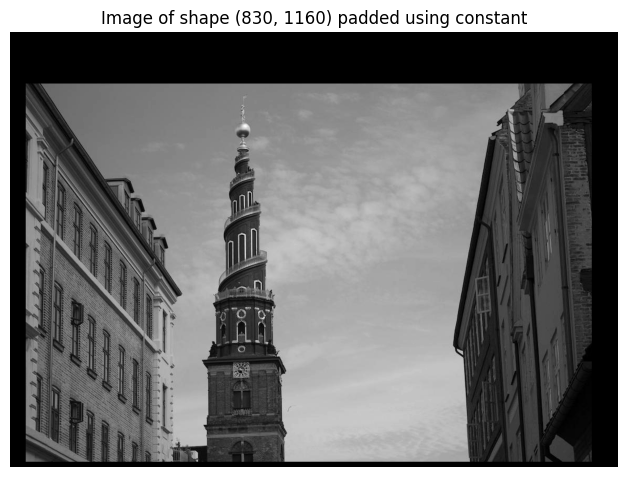

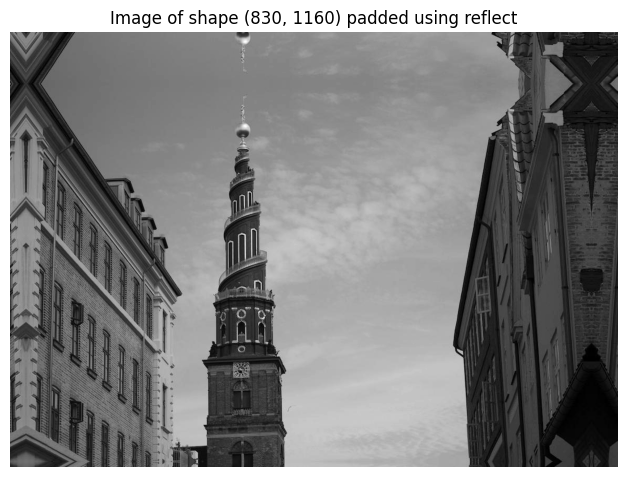

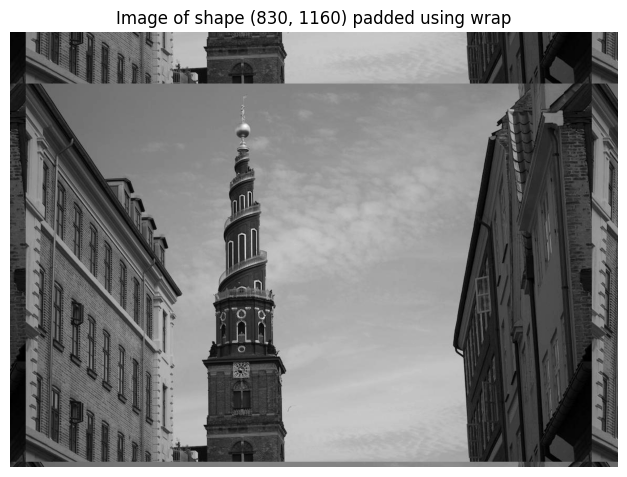

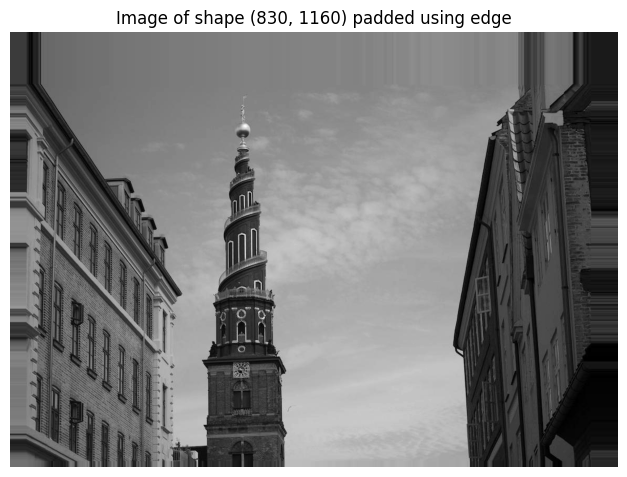

In [8]:
padding_size = [[100, 10], [30, 50]] # ((top, bottom), (left, right))
# Sadly the variable arguments for np.pad make a loop possible but ugly
image_padded_constant = np.pad(image_gray, padding_size, mode='constant', constant_values=0)
image_padded_reflect = np.pad(image_gray, padding_size, mode='reflect', )
image_padded_wrap = np.pad(image_gray, padding_size, mode='wrap')
image_padded_edge = np.pad(image_gray, padding_size, mode='edge')

show_image(image_gray, name='original image')
show_image(image_padded_constant, name=f'padded using constant')
show_image(image_padded_reflect, name=f'padded using reflect')
show_image(image_padded_wrap, name=f'padded using wrap')
show_image(image_padded_edge, name='padded using edge')

In [9]:
def convolution2d(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1, 'kernel must be an odd number for this convolution function'
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    
    # Get the dimensions of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Compute the output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize the output matrix
    output = np.zeros((output_height, output_width))
    
    # Perform 2D convolution
    for i in range(output_height):
        for j in range(output_width):
            output[i,j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)
    
    return output

*Use the cell below to test your implementation and the next cell to compare your implementation to scipy's*

In [10]:
# First example from group discussion:
print("w (kernel):")
w       = np.array([[1,2,1]])
print(w)
print("input array:")
f_in    = np.array([[0,1,0],[0,2,0],[0,3,0]])
print(f_in)
f_out   = convolution2d(f_in,w)
print("valid output:")
print(f_out)
print("f_in zero padded:")
f_padded = np.pad(f_in, [(0, 0), (1,1)], constant_values=0)
print(f_padded)
f_out_padded   = convolution2d(f_padded, w) # note here that we use scipy's implementation since our's do zero padding.
print("zero padded after convolution:")
print(f_out_padded)

w (kernel):
[[1 2 1]]
input array:
[[0 1 0]
 [0 2 0]
 [0 3 0]]
valid output:
[[2.]
 [4.]
 [6.]]
f_in zero padded:
[[0 0 1 0 0]
 [0 0 2 0 0]
 [0 0 3 0 0]]
zero padded after convolution:
[[1. 2. 1.]
 [2. 4. 2.]
 [3. 6. 3.]]


In [11]:
# Validate that our implementation matches scipy's
f_out_scipy = scipy_conv2d(f_in,w,mode="valid")
f_out_scipy_padded = scipy_conv2d(f_in,w,mode="same")

print(f'Difference between own convolution and scipy:\n'
      f'\t\t\t\tScipy\tOwn\n'
      f'Shape valid:\t{f_out.shape}, {f_out_scipy.shape}\n'
      f'Diff valid: {np.sum(f_out - f_out_scipy)}\n'
      f'Shape same:\t\t{f_out_padded.shape}, {f_out_scipy_padded.shape}\n'
      f'Diff same: {np.sum(f_out_padded - f_out_scipy_padded)}\n'
      )

Difference between own convolution and scipy:
				Scipy	Own
Shape valid:	(3, 1), (3, 1)
Diff valid: 0.0
Shape same:		(3, 3), (3, 3)
Diff same: 0.0



## Exercise 2: Kernel design


You should use the 2D convolution function from the previous exercise to compute the convolution between the image you loaded before and some simple kernels/filters that can make the image blurry or sharp and can be used to highlight the edges.  

- The first filter is blurry filter, in its 3x3 shape, this is given by the following matrix:

  $$ F_{blurry} = \frac{1}{9} \left[ {\begin{array}{ccc} 1&1&1\\1&1&1\\1&1&1 \end{array}} \right] $$
                                   
    where the normalization factor is computed by $\frac{1}{\sum_{i,j}F_{i,j}}$.

    - In case the image is a high-definition image, we suggest you to create a larger filter to actually see the blurrying effect (try 7x7 or 11x11)!
 **1. Why does this kernel blur the image?**
  

We need a function to translate the image to floats in the range (0, 1):

In [12]:
def img_as_float(image):
    return image / 255.0

In [ ]:
t = time()
img_float = img_as_float(image_gray)
# Implement the kernel for F_blurry
F_blurry = np.ones((3,3)) / 9

**2. Apply your convolution function to the image using the blurry kernel **

In [ ]:
img_float_padded = np.pad(img_float, ((1,1), (1,1)), constant_values=0)
img_blur = convolution2d(img_float_padded, F_blurry)
show_image(img_blur, name='blurry')
time_own = time() - t

*It is all well and good to write nice functions that do the job, but if a third party library for python can do the same thing, chances are they do it significantly faster than your own.
As an illustration for why you should use libraries and not your own implementations in most cases notice the difference in run time between the two (and we will use scipy's from now on):* 

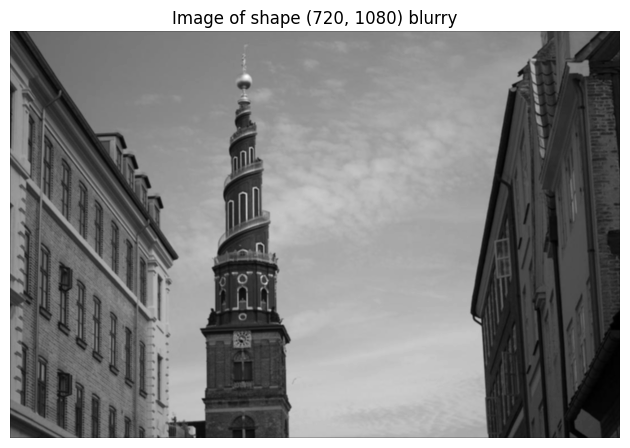

Own took 5.5718, Scipy took 0.2918, so  5.24 % of our implementation


In [14]:
t = time()
img_blur = scipy_conv2d(img_float, F_blurry, mode='same')
show_image(img_blur, name='blurry')
time_scipy = time() - t
print(f'Own took {time_own:.4f}, Scipy took {time_scipy:.4f}, so {time_scipy/time_own * 100: .2f} % of your implementation')

**3. \*See if you can improve and optimise your own implementation to reduce the gap between the two.**

**4. Implement the following two filters:**

- The second filter you are going to apply is used to sharpen the image, this is given by:

  $$ F_{sharp} = \left[ {\begin{array}{ccc}0&-1&0\\-1&7&-1\\0&-1&0\end{array}} \right] $$ 

In [15]:
# Implement the kernel for F_sharp
F_sharp = np.array([[0, -1, 0], [-1, 7, -1], [0, -1, 0]])
img_sharp =scipy_conv2d(img_float,F_sharp)

- The last filter is used to highlight the edges of the objects in the image. This filter is an approximation of a Laplacian filter. The Laplacian is the measure of the 2nd derivative of an image. Therefore if we have an image with pixel intensity values $f_{in}(x,y)$, the Laplacian is given by $\frac{\partial^2 I}{\partial i^2} + \frac{\partial^2 I}{\partial j^2}$.

$$ F_{edge} = \left[ {\begin{array}{ccc}0&1&0\\1&-4&1\\0&1&0\end{array}} \right] $$ 
         

In [16]:
# Implement the kernel for F_edge
F_edge  = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

img_edge = scipy_conv2d(img_float,F_edge)


- What happens if you run the sharpen filter on blurry image? Try it.
- Try to filter an image multiple time. What happens to the intensity lines?

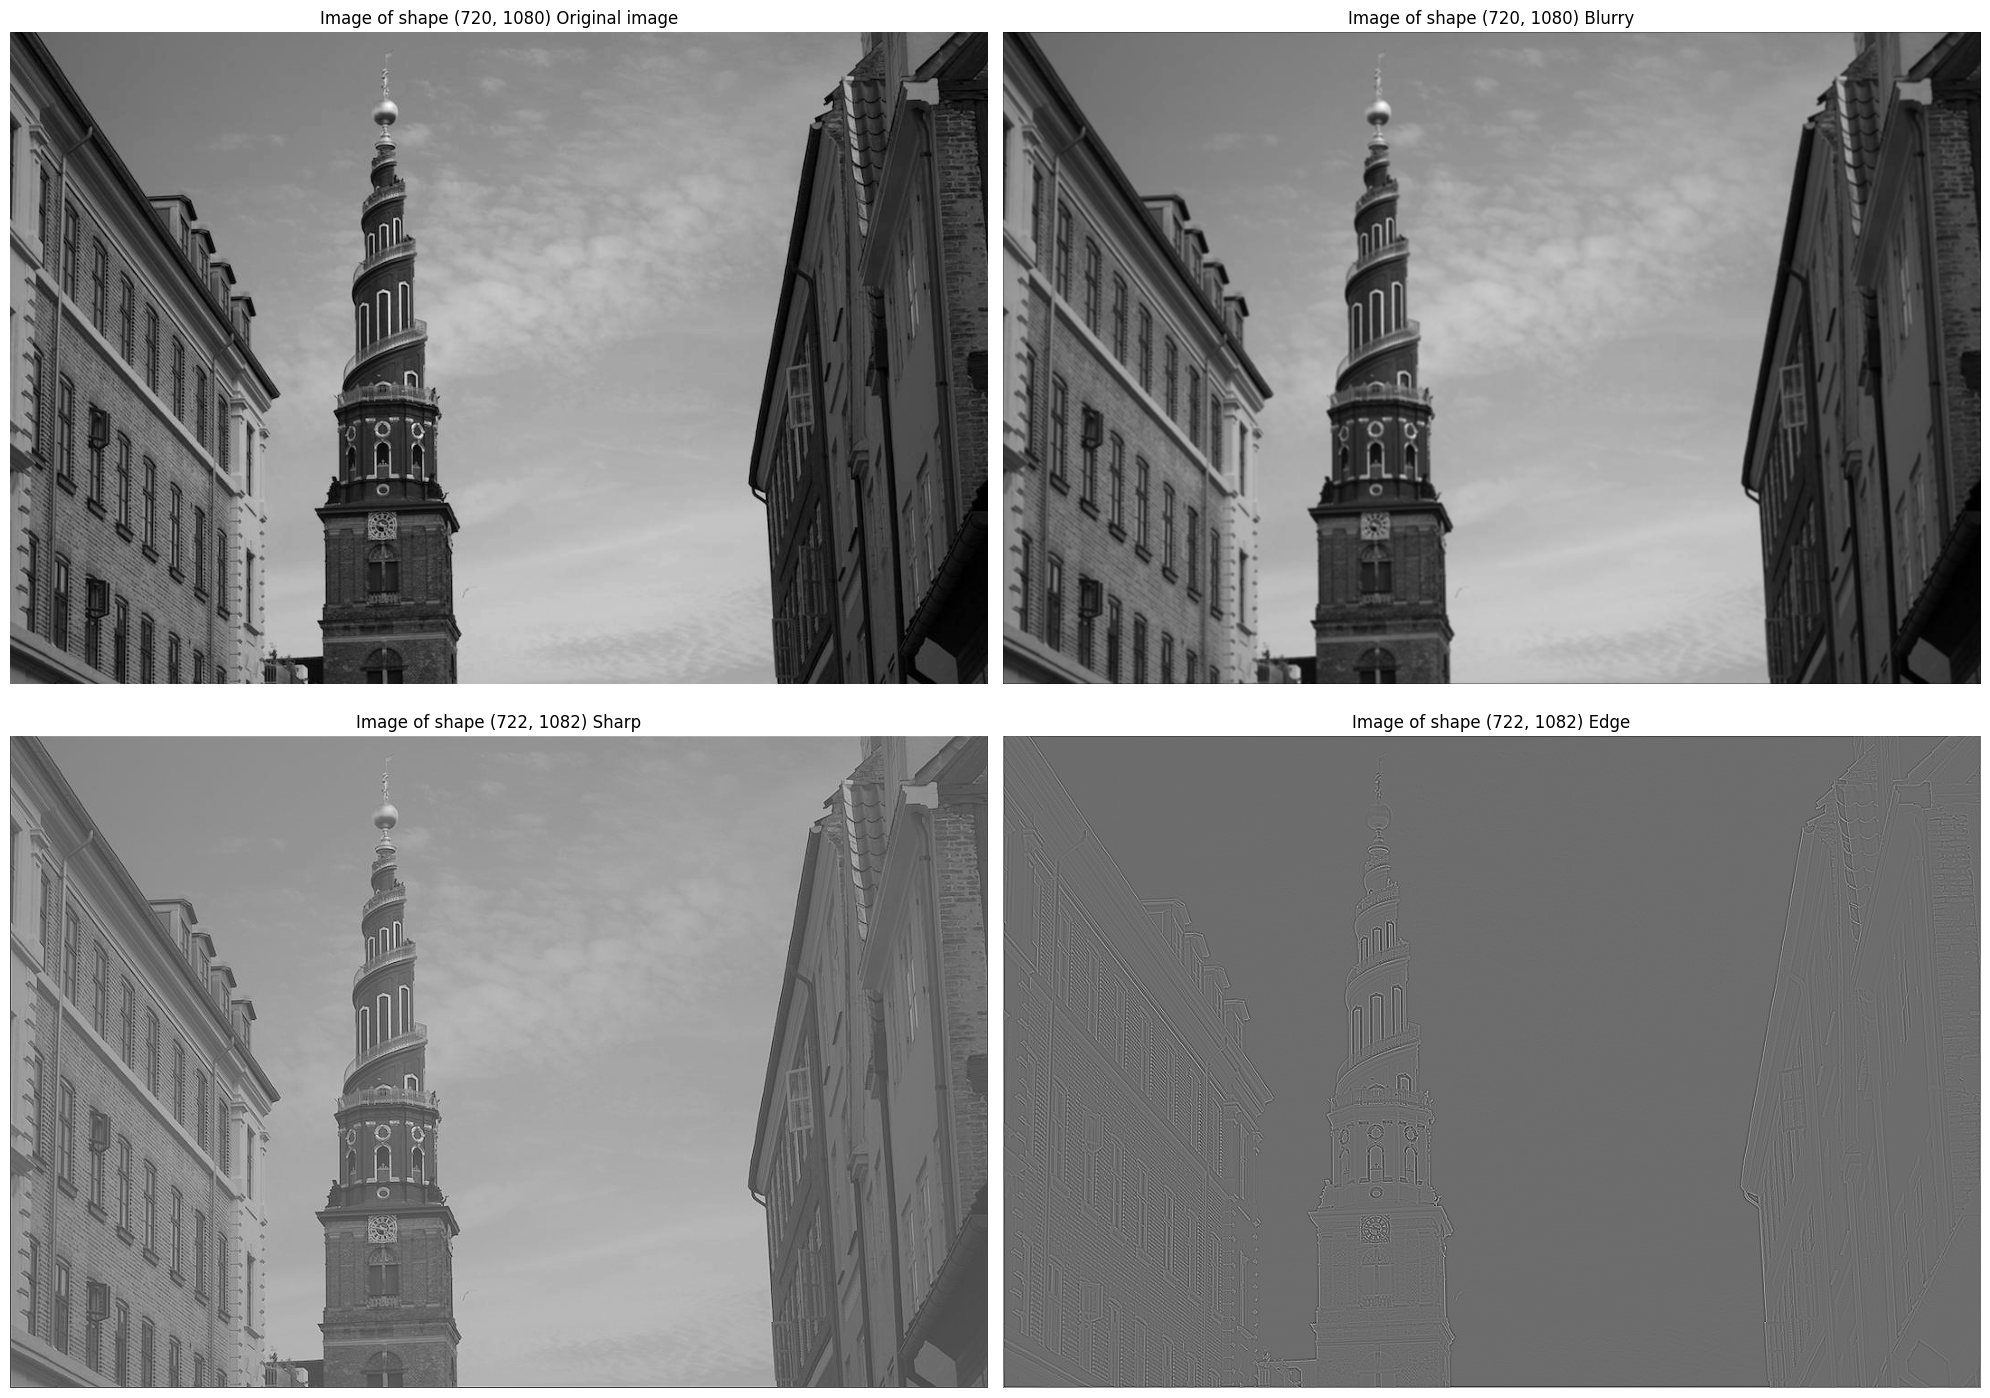

In [17]:
fig = plt.figure(figsize = (20,15))
plt.subplot(2,2, 1)
show_image(img_float, name='Original image', show=False)

plt.subplot(2,2, 2)
show_image(img_blur, name='Blurry', show=False)

plt.subplot(2,2,3)
show_image(img_sharp, name='Sharp', show=False)

plt.subplot(2,2,4)
show_image(img_edge, name='Edge', show=False)

plt.show()

## Exercise 3: Sobel filter

In this exercise you are going to apply a more sophisticated edge detection filter than the one you used in the previous exercise. We will apply a Sobel filter to the original image. The Sobel filter (also known as Sobel operator https://en.wikipedia.org/wiki/Sobel_operator) is composed by these two different filters:

$$ F_{v} = \left[ {\begin{array}{ccc}-1&0&1\\-2&0&2\\-1&0&1\end{array}} \right] $$ 
                                   
$$ F_{h} = \left[ {\begin{array}{ccc}-1&-2&-1\\0&0&0\\1&2&1\end{array}} \right] $$ 
                                  
These two filter, when convoluted with an image, are approximating the derivatives for the vertical and horizontal changes. Indeed, we have that we have that the value of the derivative is high when there is an high difference between neighbours pixels. And that is exactly where an edge is. 

If we denoted with $G_{v}$ and $G_{h}$ the resulting filtered images obtained by the convolution between $F_{v}$ and $F_{h}$ with the original image, we can use them to compute the approximation of the gradient for each point in the image by computing:

$$ G = \sqrt{ G_{v}^2 + G_{h}^2} $$


The code below does the following:
- Computes the two $G_{v}$ and $G_{h}$ filtered image and plot them. Comment on the resulting plots.
- Computes G and plot it. Compare the plot obtained by using this approach and the one using the single filter in previous the exercise.


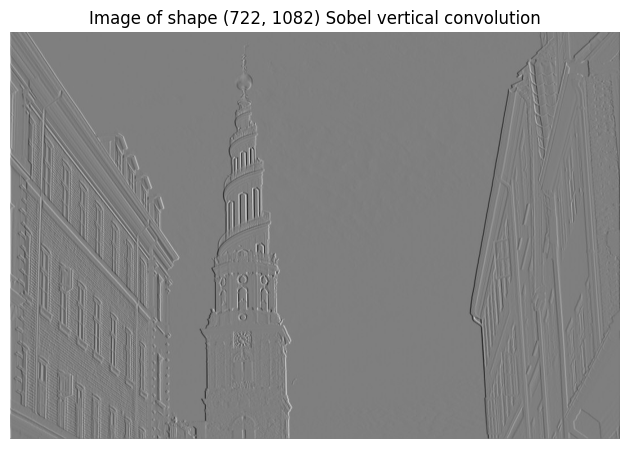

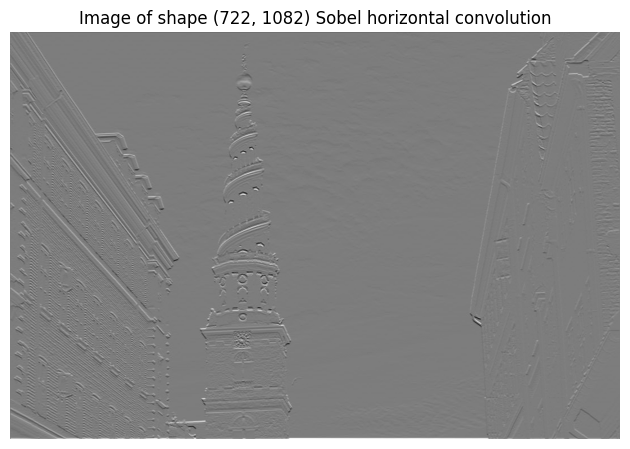

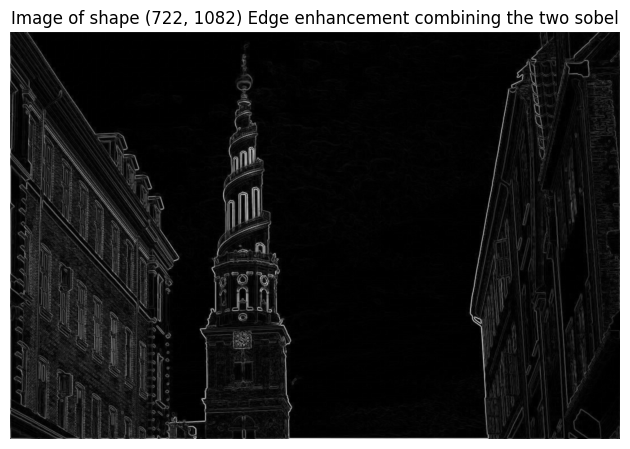

In [18]:
sobel_kernel_v = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_kernel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

G_v = scipy_conv2d(img_float,sobel_kernel_v)
G_h = scipy_conv2d(img_float,sobel_kernel_h)
G   = np.sqrt((G_v**2 + G_h**2))

show_image(G_v, name='Sobel vertical convolution' )
show_image(G_h, name='Sobel horizontal convolution')
show_image(G, name='Edge enhancement combining the two sobel')

## Exercise 4 RGB images
Now we shall see, that the techniques you just used for grayscale images are also applicable to color images, but instead the convolution is done for each color dimension (One could also imagine applications where we apply a 3D filter to the image, treating the channels as a 3rd dimension).

### Things to do:
- Load the *field.png* RGB image and study the provided code which displays the color channels separately
- Have a look at the *filter* variable. What do you think happens when convolving a color image with this 3D kernel?
- Study the code that convolve the image with the kernel. 
- What do you see in the resulting image?

(1080, 1920, 3)


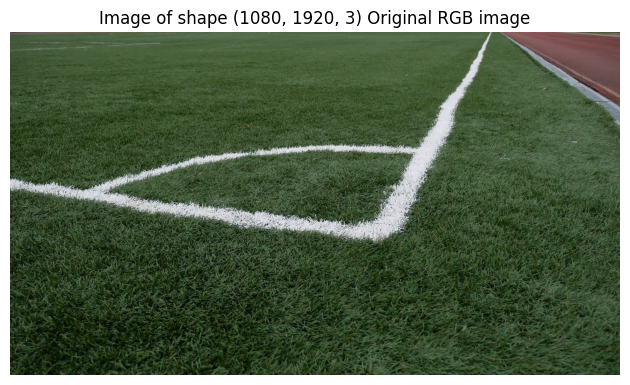

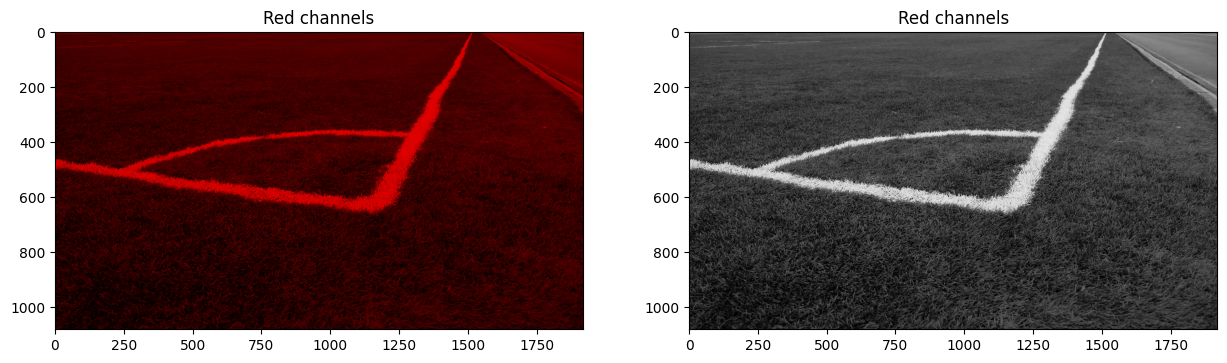

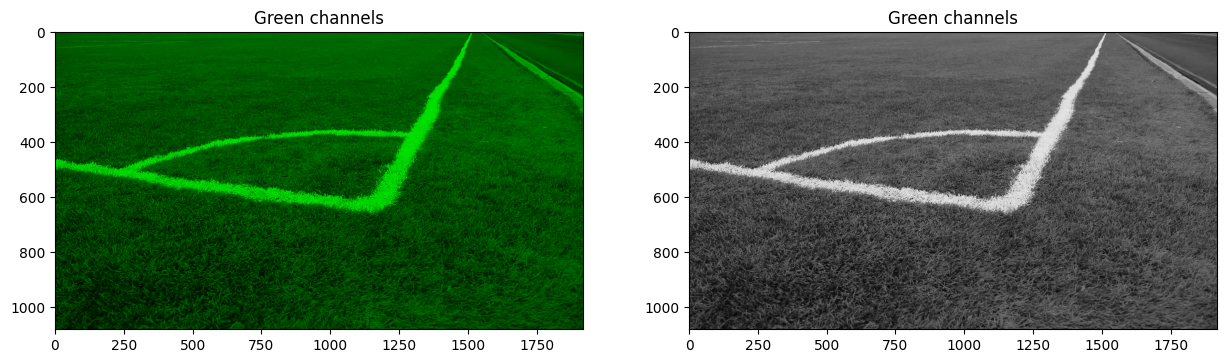

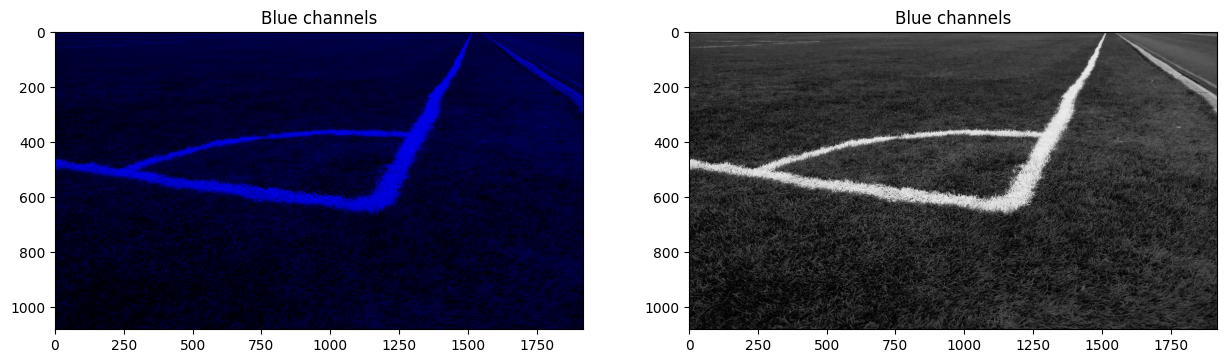

In [19]:
def plot_color_channels(your_image):
    ### we can plot the three different RGB component of the image
    channels_indx = [0,1,2]
    channels_name = ['Red', 'Green', 'Blue']
    ## plot the RGB component
    for i, name in zip(channels_indx, channels_name):
        f = plt.figure(figsize=(15,15))
        to_print = np.zeros_like(your_image, dtype="uint8")
        to_print[:,:,i] = your_image[:,:,i]
        f.add_subplot(1,2, 1)
        plt.imshow(to_print)
        plt.title('{} channels'.format(name))
        f.add_subplot(1,2, 2)
        plt.imshow(your_image[:,:,i], 'gray')
        plt.title('{} channels'.format(name))
        plt.show()
        

img = np.array(Image.open((join('images', 'field.png')))) # load image
print(np.shape(img))
show_image(img,('Original RGB image'))

#plot the individual color channels
plot_color_channels(img)

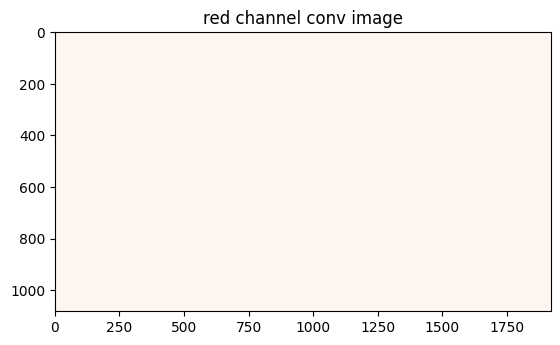

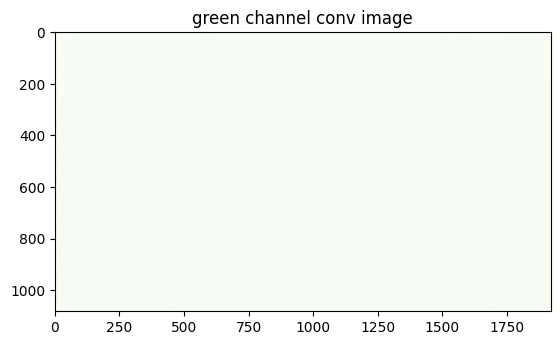

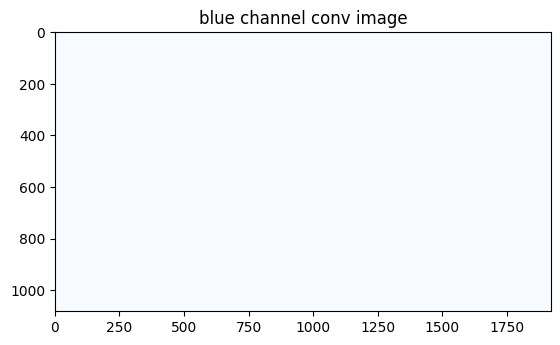

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8117647058823525..2.145098039215686].


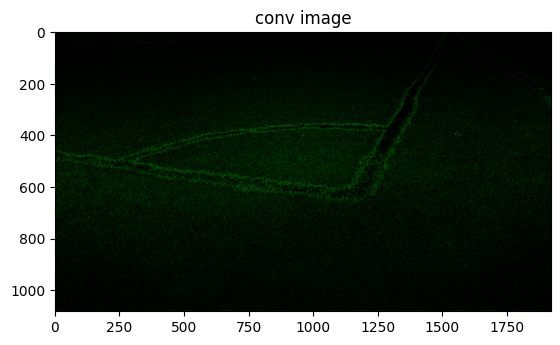

(1082, 1922, 3)


In [34]:
#filter the image
filter = np.array([[[0,0,0],[0,0,0],[0,0,0]], [[0,1,0],[1,-4,1],[0,1,0]], [[0,0,0],[0,0,0],[0,0,0]]])

# ectract the three channels
r_channel = img_as_float(img[:,:,0])
g_channel = img_as_float(img[:,:,1])
b_channel = img_as_float(img[:,:,2])

r_fil = scipy_conv2d(r_channel,filter[0,:,:])
plt.imshow(r_fil,'Reds', vmin=0, vmax=1)
plt.title('red channel conv image')
plt.show()
g_fil = scipy_conv2d(g_channel,filter[1,:,:])
plt.imshow(g_fil,'Greens', vmin=0, vmax=1)
plt.title('green channel conv image')
plt.show()
b_fil = scipy_conv2d(b_channel,filter[2,:,:])
plt.imshow(b_fil,cmap='Blues', vmin=0, vmax=1)
plt.title('blue channel conv image')
plt.show()
# adding the results of the convolutions
final = np.stack((r_fil, g_fil, b_fil), axis=-1)
# Note: normally we would not clip the output of a filter (we would add an offset and/or scale the image back to the range 0-255), but for illustration purposes we choose this way.

plt.imshow(final,'gray', vmin=0, vmax=1)
plt.title('conv image')
plt.show()
print(final.shape)

In [31]:
b_fil.min()

0.0

## (Cross)-Entropy


### Exercise 2.1

**1. Discuss (and write down) what cross-entropy measures in your own words**

$\dots$


### Exercise 2.2:

*Assume you have a prediction from a neural network, with 3 probabilities denoting the
certainty. You also have a one-hot encoded vector which is 0 everywhere but in the place
which corresponds to the correct class.*

**1. How should the prediction probabilities look if you wanted to maximize cross-entropy?**

$\dots$

**2. How about if you wanted to minimize it?**

$\dots$

**3. Do you see any potential issues with a neural network using this loss?** (*Hint: Check out [On Calibration of Modern Neural Networks](https://arxiv.org/abs/1706.04599) p. 4: NLL*)

$\dots$
